###Importing Library

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
import seaborn as sns
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Importing Dataset

In [0]:
train=pd.read_csv('/content/drive/My Drive/Toxic Comment Dataset/train.csv')
test=pd.read_csv('/content/drive/My Drive/Toxic Comment Dataset/test.csv')
sample_submission =pd.read_csv('/content/drive/My Drive/Toxic Comment Dataset/sample_submission.csv')

In [4]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [0]:
labels = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

###Plot Labels in Bar Graph

clean               143346
toxic               15294
severe_toxic        1595
obscene             8449
threat              478
insult              7877
identity_hate       1405


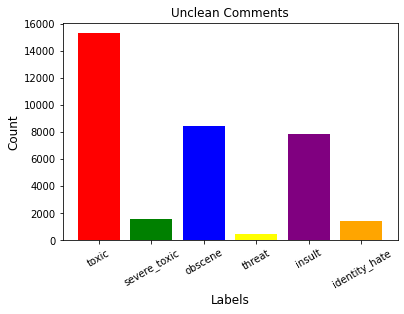

In [6]:
x=train.iloc[:,2:].sum()
rowsum=train.iloc[:,2:].sum(axis=1)
train['clean']=(rowsum==0)
clean=train['clean'].sum()
x=x.tolist()
print('{:<20s}{:>1s}'.format('clean',str(clean)))
for i in range (0,6):
   print('{:<20s}{:>1s}'.format(labels[i],str(x[i])))

#x.append(clean)
plt.bar(labels,x,color=['red', 'green', 'blue', 'yellow', 'purple','orange'])
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(labels, fontsize=10, rotation=30)
plt.title('Unclean Comments')
plt.show()
#sns.barplot(labels,x,palette='muted')
#plt.title("Unclean Comments")
plt.show()

###Plot Correlation Heat Map

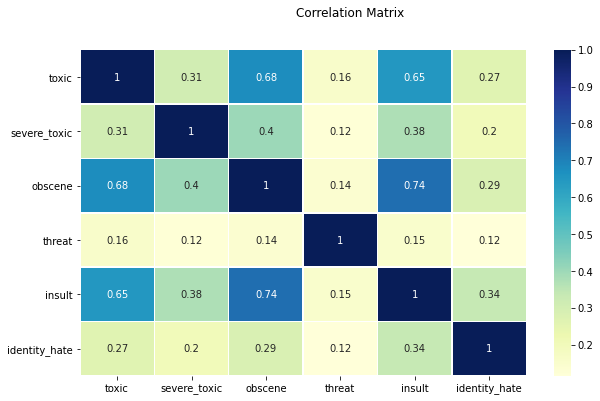

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Correlation Matrix')
sns.heatmap(train[labels].corr(), annot=True, cmap="YlGnBu", linewidths=.5, ax=ax);

###Pre-Processing Text
* Cleaning of text includes removing of number,punctuations and keeping only 
letters in text.
* Lemmatization of each word basically process of finding the lemma of a word depending on their meaning.
* Using Stopword Dictionary removes stopwords like and,the,be etc.  

In [0]:
def clean_text(text):
    text=re.sub('[^a-zA-Z]', ' ',text)
    text=text.lower()
    text=text.split()
    #lm = WordNetLemmatizer()
    #text=[lm.lemmatize(word) for word in text if not word in set(stopwords.words('english'))]
    text=[word for word in text if not word in set(stopwords.words('english'))]
    text=' '.join(text)
    return text

In [0]:
train['comment_text'] = train['comment_text'].map(lambda x : clean_text(x))
test['comment_text'] = test['comment_text'].map(lambda x : clean_text(x))

In [10]:
train[:10]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,True
1,000103f0d9cfb60f,aww matches background colour seemingly stuck ...,0,0,0,0,0,0,True
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,True
3,0001b41b1c6bb37e,make real suggestions improvement wondered sec...,0,0,0,0,0,0,True
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,True
5,00025465d4725e87,congratulations well use tools well talk,0,0,0,0,0,0,True
6,0002bcb3da6cb337,cocksucker piss around work,1,1,1,0,1,0,False
7,00031b1e95af7921,vandalism matt shirvington article reverted pl...,0,0,0,0,0,0,True
8,00037261f536c51d,sorry word nonsense offensive anyway intending...,0,0,0,0,0,0,True
9,00040093b2687caa,alignment subject contrary dulithgow,0,0,0,0,0,0,True


In [11]:
X=train['comment_text']
test_X=test['comment_text']
print(X.shape, test_X.shape)

(159571,) (153164,)


###TF-IDF Vectorizer
* TF -> Term Frequency
* IDF -> Inverse Document Frequency
* Use of TF-IDF vectorizer to make matrix of features more storng and correlated.
* Basically it penilizes the word according to its frecuency in Sentence as well as its frequency in document.
* Use n_gram range of 1 and Max Features to 10000 to reduce complexity and time for compilatiom.


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=10000)
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=10000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

###Creating Matrix of Features

In [13]:
X_dtm=vect.fit_transform(X)
test_X_dtm=vect.transform(test_X)
X_dtm
test_X_dtm

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 3229479 stored elements in Compressed Sparse Row format>

In [0]:
cols_target = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']

###Fit it into Logistic Regression Model
Train my model on Logistic regression for each label and predict the labels of each sentence and stored in sample submission file.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lg = LogisticRegression(max_iter=200)
for label in cols_target:
    print('... Processing {}'.format(label))
    y = train[label]
    # train the model using x_features & y
    lg.fit(X_dtm, y)
    # compute the training accuracy
    y_pred_X = lg.predict(X_dtm)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    # compute the predicted probabilities for X_test_dtm
    test_y_prob = lg.predict_proba(test_X_dtm)[:,1]
    sample_submission[label] = test_y_prob


... Processing obscene
Training accuracy is 0.9801342349173722
... Processing insult
Training accuracy is 0.9734099554430317
... Processing toxic
Training accuracy is 0.961559431224972
... Processing severe_toxic
Training accuracy is 0.9909570034655419
... Processing identity_hate
Training accuracy is 0.9926365066334109
... Processing threat
Training accuracy is 0.9972802075565109


In [16]:
sample_submission.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.997998,0.189017,0.995582,0.030830,0.930438,0.264599
1,0000247867823ef7,0.010179,0.003211,0.005405,0.001794,0.008164,0.003535
2,00013b17ad220c46,0.015085,0.001640,0.005506,0.000830,0.009273,0.002496
3,00017563c3f7919a,0.004947,0.002751,0.004358,0.001194,0.004178,0.001105
4,00017695ad8997eb,0.028637,0.002832,0.008100,0.001476,0.010657,0.003148
5,0001ea8717f6de06,0.008561,0.001090,0.003848,0.000746,0.006427,0.001451
6,00024115d4cbde0f,0.003490,0.000546,0.003421,0.000405,0.003370,0.000899
7,000247e83dcc1211,0.526263,0.003507,0.059220,0.003388,0.112772,0.005038
8,00025358d4737918,0.026795,0.003554,0.013688,0.002550,0.011982,0.004580
9,00026d1092fe71cc,0.008461,0.001324,0.006204,0.001123,0.008794,0.002080


In [0]:
sample_submission.to_csv('submit1.csv')

In [0]:
sample_submission1 =pd.read_csv('/content/drive/My Drive/Toxic Comment Dataset/sample_submission.csv')

###Fit the model into Naive Bayes Classifier
As Naive Bayes classifier works very well in NLP.
In TF-IDF we consider all words to be independent and also don't consider the relative order of words in predicting our answer to reduce the complexicity of model.and in Naive Bayes also we assume that every feature is independent of the others, in order to predict the category of a given sample.  

In [19]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import accuracy_score
mnb = MultinomialNB()
for label in cols_target:
    print('... Processing {}'.format(label))
    y = train[label]
    # train the model using x_features & y
    mnb.fit(X_dtm, y)
    # compute the training accuracy
    y_pred_X = mnb.predict(X_dtm)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    # compute the predicted probabilities for X_test_dtm
    test_y_prob = mnb.predict_proba(test_X_dtm)[:,1]
    sample_submission1[label] = test_y_prob


... Processing obscene
Training accuracy is 0.9744001102957305
... Processing insult
Training accuracy is 0.9699005458385296
... Processing toxic
Training accuracy is 0.9528736424538293
... Processing severe_toxic
Training accuracy is 0.9906937977452043
... Processing identity_hate
Training accuracy is 0.9916275513721164
... Processing threat
Training accuracy is 0.9969856678218473


In [20]:
sample_submission1.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.996056,0.212723,0.987146,0.005882,0.965938,0.180809
1,0000247867823ef7,0.014682,0.001131,0.006591,0.000426,0.006195,0.001245
2,00013b17ad220c46,0.025237,0.000634,0.010027,0.000157,0.009518,0.000934
3,00017563c3f7919a,0.007084,0.000134,0.002639,0.000019,0.002418,0.000083
4,00017695ad8997eb,0.039592,0.005247,0.026726,0.001410,0.025099,0.004573


In [0]:
sample_submission1.to_csv('submit2.csv')

###Final Result
Now to Increase our accuracy we take the average of predictions of our Logistic Regression and Naive Bayes Classifires. 

In [0]:
submission_combined = pd.read_csv('/content/drive/My Drive/Toxic Comment Dataset/sample_submission.csv')
for label in cols_target:
    submission_combined[label] = 0.5*(sample_submission[label]+sample_submission1[label])

In [23]:
submission_combined.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.997027,0.200870,0.991364,0.018356,0.948188,0.222704
1,0000247867823ef7,0.012431,0.002171,0.005998,0.001110,0.007179,0.002390
2,00013b17ad220c46,0.020161,0.001137,0.007767,0.000494,0.009396,0.001715
3,00017563c3f7919a,0.006015,0.001443,0.003498,0.000607,0.003298,0.000594
4,00017695ad8997eb,0.034114,0.004040,0.017413,0.001443,0.017878,0.003860


In [0]:
submission_combined.to_csv('submission_combined.csv', index=False)